# K-Means

## Understanding K-means

This algorithm will help you to find and identify categories/clusters of datapoints in a dataset.

<img src="img/before&after.png" width="600" height="400">

__How did it do that ?__

<img src="img/steps.png" width="800" height="600">

__Detailed steps__

<img src="img/step1.png" width="400" height="200">

<img src="img/step2.png" width="600" height="400">

<img src="img/step3.png" width="600" height="400">

<img src="img/step4.png" width="600" height="400">

<img src="img/step5.png" width="600" height="400">

Back to step 4

<img src="img/step4_2.png" width="600" height="400">

<img src="img/step5_2.png" width="600" height="400">

Back to step 4 again

<img src="img/step4_3.png" width="600" height="400">

<img src="img/step5_3.png" width="600" height="400">

Now the green equidistant line is not changing anything, evroy points are in the correct clusters.

<img src="img/final_step.png" width="600" height="400">

## K-means Random Initialization Trap

What would if we had a bad random initialisation ?

If the don't choose randomly bad centroids, we can get wrong clusters at the end.

A solution to prevent it's to use the K-mean ++ algorithm.

## Selecting the right number of clusters

We need to evaluate how a certain number of clusters performs. 
This evaluation can be done with the __Within cluster sum of squares__

<img src="img/WCSS.png" width="600" height="200">

We take every points in each clusters and sum the square of the distances between the points and the centroids.

<img src="img/WCSS_chart.png" width="600" height="400">

If you increase the number of clusters the distances between points and centroids will decrease so the WCSS will also decrease.

<img src="img/WCSS_evo.png" width="600" height="400">

The elbow method will help you to find the optimal number of clusters.

<img src="img/elbow_method.png" width="600" height="400">

Now let's start our practical example.



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In this dataset contains informations of clients of a mall. 

So as a reminder of the spending score is a score that the amount computed for each of their clients based on several criteria including for example their income the number of times per week they show up in the mall.

The goal of our study is to segment clients based on the annual income and spending score.

Let's build a array with only these two columns.

In [4]:
X = dataset.iloc[:, [3, 4]].values

X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Now let's choose the correct number of clusters using the Elbow method and the Kmeans class

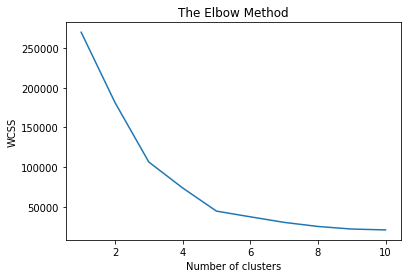

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    # Create an object of our Kmeans class and the kmean++ init - 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,n_init = 10, random_state = 0)
    
    # Fit the algo with the data
    kmeans.fit(X)
    
    # Calculate the WCSS (inertia) for each cluster
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

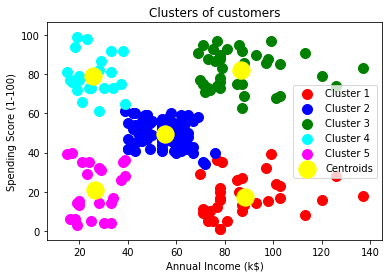

In [11]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

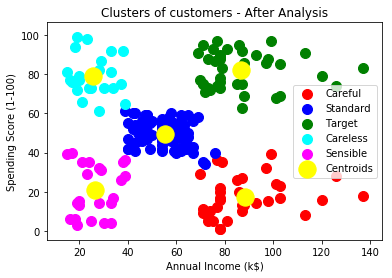

In [14]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers - After Analysis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()